In [1]:
import pandas as pd


In [5]:
dataset=pd.read_csv("PrePlacement.csv")


In [7]:
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [ ]:
#1 NaN values
Numerical data: Replace NaN with the column mean or median
Categorical data: Replace NaN with the mode 

In [123]:
#2 not placed
not_placed_count = dataset['status'].value_counts().get('Not Placed', 0)
print(f"Number of individuals not placed: {not_placed_count}.")

Number of individuals not placed: 67.


In [ ]:
#3 reason for not placed
here is the reason data is insufficient here. we can predict the reason for the not placed.

In [127]:
#4 kindofrelation
dataset.cov(numeric_only = True)

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,3870.000000,-52.641355,-59.598879,-41.465047,52.556168,8.102336,1.138318e+04
ssc_p,-52.641355,117.228377,58.853253,42.702550,37.659225,24.535952,9.088585e+05
hsc_p,-59.598879,58.853253,112.063731,33.684453,33.838355,21.517688,7.310079e+05
degree_p,-41.465047,42.702550,33.684453,53.604710,22.078774,17.185200,4.663363e+05
etest_p,52.556168,37.659225,33.838355,22.078774,176.251018,16.886973,3.727004e+05
mba_p,8.102336,24.535952,21.517688,17.185200,16.886973,34.028376,1.239934e+05
salary,11383.177570,908858.485818,731007.850848,466336.264888,372700.449468,123993.387361,2.259185e+10


In [ ]:
The covariance between mba_p and salary in dataset is 123993.387361. 
Since this value is positive, it indicates a positive covariance.
This means that as mba_p performance in the MBA increases, salary tends to increase as well.

In [129]:
dataset.corr(numeric_only = True)

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.090500,-0.091039,0.063636,0.022327,0.001217
ssc_p,-0.078155,1.000000,0.513478,0.538686,0.261993,0.388478,0.558475
hsc_p,-0.090500,0.513478,1.000000,0.434606,0.240775,0.348452,0.459424
degree_p,-0.091039,0.538686,0.434606,1.000000,0.227147,0.402376,0.423762
etest_p,0.063636,0.261993,0.240775,0.227147,1.000000,0.218055,0.186775
mba_p,0.022327,0.388478,0.348452,0.402376,0.218055,1.000000,0.141417
salary,0.001217,0.558475,0.459424,0.423762,0.186775,0.141417,1.000000


In [ ]:
Correlation between salary and mba_p
Value: 0.141417
Type: Very weak positive correlation 


In [131]:
#5 min sal
min_salary_row = dataset.loc[dataset['salary'].idxmin()]
min_salary_specialisation = min_salary_row['specialisation']
min_salary_value = min_salary_row['salary']
print(f"The specialisation getting the minimum salary is '{min_salary_specialisation}' with a salary of {min_salary_value}.")


The specialisation getting the minimum salary is 'Mkt&HR' with a salary of 0.0.


In [133]:
#6 above 5,00,000
above_500k_count = (dataset['salary'] > 500000).sum()
print(f"Number of individuals earning above 500,000 salary: {above_500k_count}.")


Number of individuals earning above 500,000 salary: 3.


In [135]:
from scipy.stats import ttest_ind

In [151]:
#7 anavo
import scipy.stats as stats
stats.f_oneway(dataset['etest_p'], dataset['mba_p'])

F_onewayResult(statistic=98.64487057324706, pvalue=4.672547689133573e-21)

In [139]:
#8 hypothesis
sci_tech = dataset[dataset['degree_t'] == 'Sci&Tech']['salary']
mkt_hr = dataset[dataset['specialisation'] == 'Mkt&HR']['salary']
ttest_ind(sci_tech,mkt_hr)

TtestResult(statistic=2.692041243555374, pvalue=0.007897969943471179, df=152.0)

In [141]:
#9 convert normal to standard distribution
def stdNBgraph(dataset):
        # Coverted to standard Normal Distribution
    import seaborn as sns
    mean=dataset.mean()
    std=dataset.std()

    values=[i for i in dataset]

    z_score=[((j-mean)/std) for j in values]

    sns.distplot(z_score,kde=True)

    sum(z_score)/len(z_score)
    #z_score.std()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_11820\2909774602.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(z_score,kde=True)


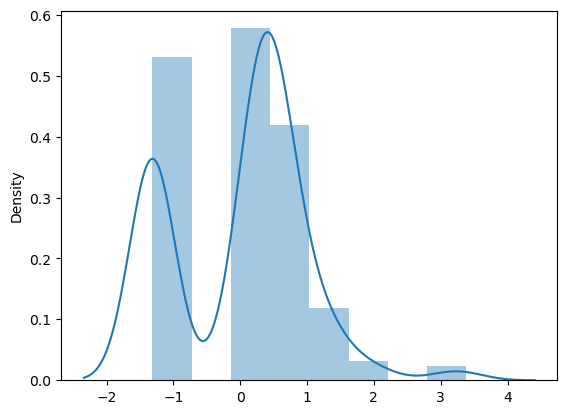

In [143]:
stdNBgraph(dataset["salary"])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11820\1524379617.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dataset['salary'],kde=True)


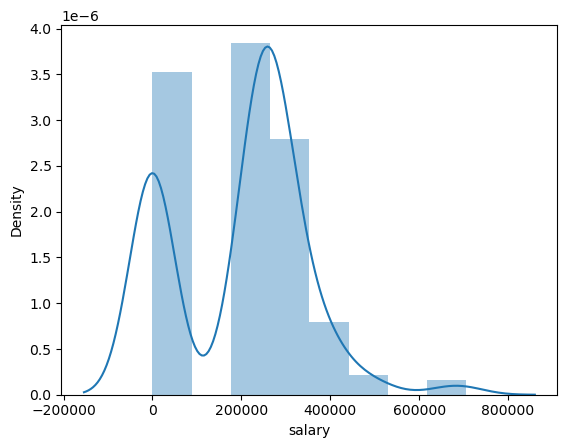

In [145]:
import seaborn as sns
x=dataset['salary']
ax = sns.distplot(dataset['salary'],kde=True)


In [147]:
#10 probability density function
def get_pdf_probability(dataset,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    ax = sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')
    pyplot.axvline(startrange,color='Red')
    pyplot.axvline(endrange,color='Red')
    # generate a sample
    sample = dataset
    # calculate parameters
    sample_mean =sample.mean()
    sample_std = sample.std()
    print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))
    # define the distribution
    dist = norm(sample_mean, sample_std)
    
    # sample probabilities for a range of outcomes
    values = [value for value in range(startrange, endrange)]
    probabilities = [dist.pdf(value) for value in values]    
    prob=sum(probabilities)
    print("The area between range({},{}):{}".format(startrange,endrange,sum(probabilities)))
    return prob


C:\Users\ASUS\AppData\Local\Temp\ipykernel_11820\1004062253.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')


Mean=197615.116, Standard Deviation=150305.844
The area between range(700000,900000):0.0004137812663830059


0.0004137812663830059

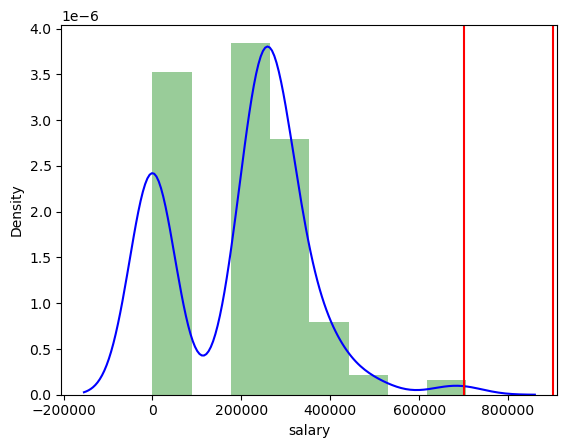

In [149]:
get_pdf_probability(dataset['salary'],700000,900000)

In [153]:
#11 Hypothesis testing
sci_tech_etest = dataset[dataset['degree_t'] == 'Sci&Tech']['etest_p']
sci_tech_mba_p = dataset[dataset['degree_t'] == 'Sci&Tech']['mba_p']
ttest_ind(sci_tech_etest, sci_tech_mba_p)

TtestResult(statistic=4.532000225151251, pvalue=1.4289217003775636e-05, df=116.0)

In [155]:
dataset.corr(numeric_only = True)

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.090500,-0.091039,0.063636,0.022327,0.001217
ssc_p,-0.078155,1.000000,0.513478,0.538686,0.261993,0.388478,0.558475
hsc_p,-0.090500,0.513478,1.000000,0.434606,0.240775,0.348452,0.459424
degree_p,-0.091039,0.538686,0.434606,1.000000,0.227147,0.402376,0.423762
etest_p,0.063636,0.261993,0.240775,0.227147,1.000000,0.218055,0.186775
mba_p,0.022327,0.388478,0.348452,0.402376,0.218055,1.000000,0.141417
salary,0.001217,0.558475,0.459424,0.423762,0.186775,0.141417,1.000000


In [ ]:
#12 highly coorelated to salary

The ssc_p has the highest correlation with salary 0.558475.
